In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install --upgrade opencv-python

In [ ]:
!pip install --upgrade numpy

In [ ]:
import cv2


# Read the image in grayscale
img = cv2.imread('pancard.png', 0)

# Display the image using cv2_show
cv2_show(img)


In [ ]:
img.shape

In [ ]:
cv2_imshow(img)

In [ ]:
dft_img = cv2.dft(np.float32(img))

cv2_imshow(dft_img)

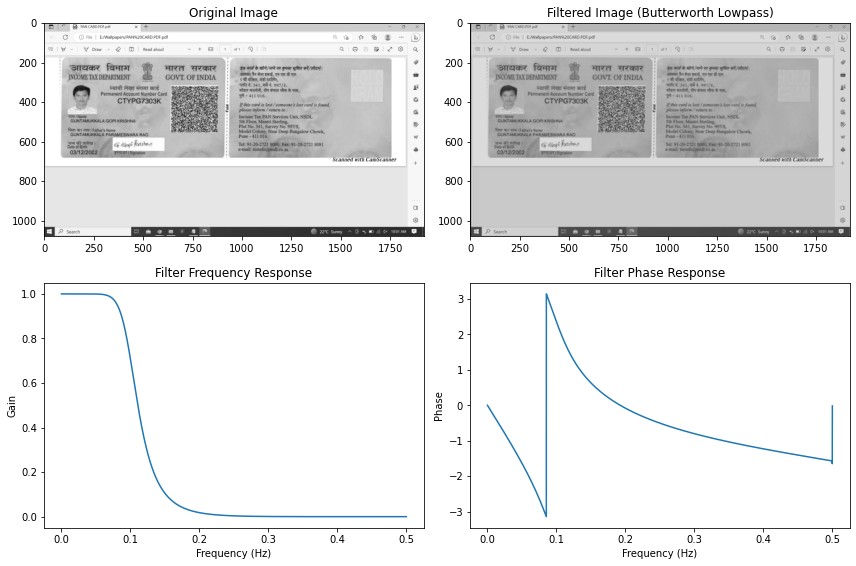

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from skimage import io, color

# Load an image and convert to grayscale
image_path = "pancard.png"  # Replace with the actual image path
image = cv2.imread(image_path)
gray_image = color.rgb2gray(image)

# Design a Butterworth Lowpass Filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters for the filter
cutoff_frequency = 0.1  # Adjust this value as needed
sampling_frequency = 1.0

# Apply the Butterworth Lowpass Filter
filtered_image = butter_lowpass_filter(gray_image, cutoff_frequency, sampling_frequency)

# Frequency response of the filter
b, a = butter_lowpass(cutoff_frequency, sampling_frequency)
w, h = freqz(b, a, worN=8000)
w *= 0.5 * sampling_frequency / np.pi

# Display the original, filtered images, and the filter response
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Butterworth Lowpass)")

plt.subplot(2, 2, 3)
plt.plot(w, abs(h))
plt.title("Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")

plt.subplot(2, 2, 4)
plt.plot(w, np.angle(h))
plt.title("Filter Phase Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")

plt.tight_layout()
plt.show()


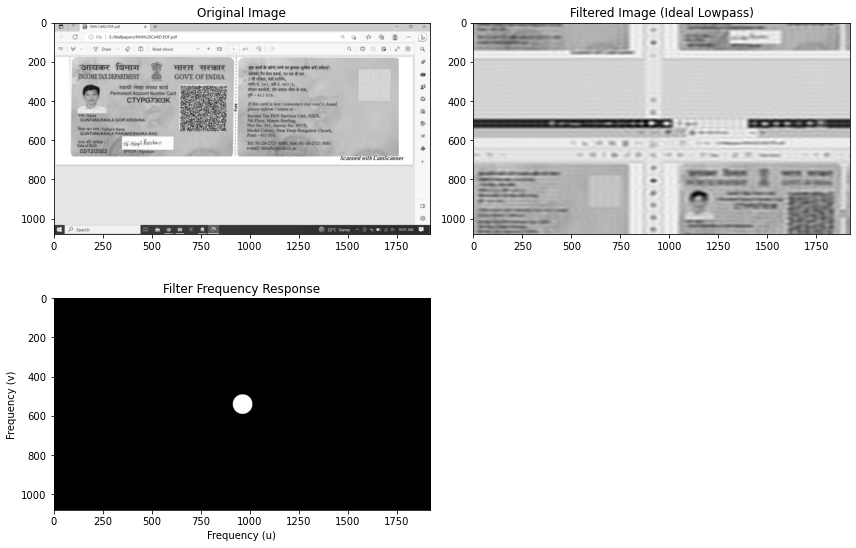

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load an image and convert to grayscale
image_path = "pancard.png"  # Replace with the actual image path
image = cv2.imread(image_path)
gray_image = color.rgb2gray(image)

# Function to create an Ideal Lowpass Filter
def ideal_lowpass_filter(shape, cutoff_frequency):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_matrix = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_frequency:
                filter_matrix[i, j] = 1

    return filter_matrix

# Parameters for the filter
cutoff_frequency = 50  # Adjust this value as needed

# Apply the Ideal Lowpass Filter
filtered_image = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(ideal_lowpass_filter(gray_image.shape, cutoff_frequency)
 * np.fft.fftshift(np.fft.fft2(gray_image)))))

# Display the original, filtered images, and the filter response
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(np.abs(filtered_image), cmap='gray')
plt.title("Filtered Image (Ideal Lowpass)")

# Ideal Lowpass Filter Frequency Response
filter_freq_response = ideal_lowpass_filter(gray_image.shape, cutoff_frequency)
plt.subplot(2, 2, 3)
plt.imshow(filter_freq_response, cmap='gray')
plt.title("Filter Frequency Response")
plt.xlabel("Frequency (u)")
plt.ylabel("Frequency (v)")

plt.tight_layout()
plt.show()


In [9]:
img = cv2.imread("pancard.png")

flip = cv2.flip(img, 1)

cv2.imshow(img, 0)

shear_factor = 0.3

shear_matrix = np.float32([[1, shear.factor, 0],
                          [0, 1, 0]])

sheared_img = cv2.WrapAffine(img, shear_matrix,(img.shape[1], img.shape[0]))

cv2_imshow()

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'
